<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/%E6%BC%94%E7%BF%92%E3%83%BBKeras%E3%81%AB%E3%82%88%E3%82%8B%E3%83%95%E3%82%9A%E3%83%AD%E3%82%AF%E3%82%99%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%AF%E3%82%99%E5%85%A5%E9%96%80%EF%BC%883%EF%BC%89_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習・Kerasによるプログラミング入門（その3）
この資料ではニューラルネットプログラミングのフレームワークであるKerasを勉強します。

## ライブラリーのインポート

次のプログラムを実行して、必要なライブラリーをインポートして下さい。

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import japanize_matplotlib
import numpy as np
```

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import japanize_matplotlib
import numpy as np

### tensorflowをインポートできなかった場合
Google Colaboratoryではエラーは発生しない筈ですが、
「tensorflowが見つからない」というエラーが発生した場合は、
**次のプログラムを実行した後、前のプログラムを再実行**して下さい。

前のプログラムでエラーが出なかった場合は、次のプログラムを実行する必要はありません。

```python
!pip install tensorflow
```

### japanize_matplotlibをインポートできなかった場合
Google Colaboratoryでは「japanize_matplotlibが見つからない」という
エラーが発生するかも知れません。
**次のプログラムを実行した後、インポートを再実行**して下さい。

前のセルでエラーが出なかった場合は、次のプログラムを実行する必要はありません。

```python
!pip install japanize_matplotlib
```

In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=092a93c28b9a5f4e2ea768893d8408bfc14243d164723b19ef551d9b95492025
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


## 多値分類問題
ラベルの種類が2より大きい分類問題を**多値分類問題**といいます。

多値分類問題は超平面（直線など）でクラスラベルを分離できないので、
問題を解決するために、複数のノードを含むニューラルネットをKerasを使って作成します。

まず、ラベルの種類が3個の訓練データを次のプログラムで作成します。

> 実は、ラベルは次の規則で決定しています。
> - データは$[0,1]\times [0,1]$の正方形領域の点とする。
> - $(x-0.3)^2 + (y-0.3)^2 < 0.09$が成り立てば、ラベル0を付与する。
> - $0.5 < x < 0.95$、かつ、$0.6 < y < 0.95$が成り立てば、ラベル1を付与する。
> - 上記以外の場合は、ラベル2を付与する。

```python
N = 500
train = np.random.rand(N, 2)
label = [[1 if (x-0.3)**2 + (y-0.3)**2 < 0.09 else 0,
          1 if x>0.5 and x<0.95 and y>0.6 and y<0.95 else 0,
          0] for x, y in train]
label = [[0,0,1] if l == [0,0,0] else l for l in label]
toPlot = [[], [], []]
for i in range(N):
    toPlot[label[i].index(1)].append(train[i])
toPlot = [np.array(toPlot[i]) for i in range(3)]
label = np.array(label)
plt.figure(figsize=(5,5))
color = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(toPlot[i][:, 0], toPlot[i][:, 1], c=color[i], label="ラベル{}".format(i))
plt.plot([0.3*np.cos(t)+0.3 for t in np.linspace(0, 2*np.pi, 101)],
         [0.3*np.sin(t)+0.3 for t in np.linspace(0, 2*np.pi, 101)],
         "--r")
plt.plot([0.5,0.95,0.95,0.5,0.5], [0.6,0.6,0.95,0.95,0.6], "--g")
plt.grid()
plt.legend()
plt.show()
```

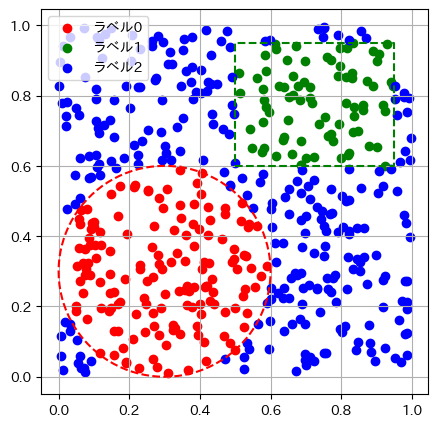

In [4]:
N = 500
train = np.random.rand(N, 2)
label = [[1 if (x-0.3)**2 + (y-0.3)**2 < 0.09 else 0,
          1 if x>0.5 and x<0.95 and y>0.6 and y<0.95 else 0,
          0] for x, y in train]
label = [[0,0,1] if l == [0,0,0] else l for l in label]
toPlot = [[], [], []]
for i in range(N):
    toPlot[label[i].index(1)].append(train[i])
toPlot = [np.array(toPlot[i]) for i in range(3)]
label = np.array(label)
plt.figure(figsize=(5,5))
color = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(toPlot[i][:, 0], toPlot[i][:, 1], c=color[i], label="ラベル{}".format(i))
plt.plot([0.3*np.cos(t)+0.3 for t in np.linspace(0, 2*np.pi, 101)],
         [0.3*np.sin(t)+0.3 for t in np.linspace(0, 2*np.pi, 101)],
         "--r")
plt.plot([0.5,0.95,0.95,0.5,0.5], [0.6,0.6,0.95,0.95,0.6], "--g")
plt.grid()
plt.legend()
plt.show()

### 多値分類の場合のラベルの表現（ワンホット符号）
データには0、1、2と3種のラベルのいずれかが振られていますが、
ラベルの種類が3種類以上の場合にはラベルの表現方法を少し工夫します。
```python
print(label[:10])
```
を実行すると、先頭の10個のデータのラベルが以下のような表示が得られる筈です。
> データはランダムに生成されますので、
実行の都度、データとラベルは変化します。
```
[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]
```
これは先頭10個のラベルが
```
[2, 1, 1, 1, 0, 2, 1, 1, 1, 0]
```
であることを示しています。

このようなラベルの表現方法を**ワンホット符号**と呼びます。

別の例として、ワンホット符号により、
血液型A, B, O, ABを次のように表現することが出来ます。
```python
[1, 0, 0, 0] # A型
[0, 1, 0, 0] # B型
[0, 0, 1, 0] # O型
[0, 0, 0, 1] # AB型
```

後に詳述しますが、
$L$個（$L > 2$）のクラスラベルを予測するニューラルネットは、
$L$次元のベクトル$(p_0, \dots, p_{L-1})$を出力します。
- ラベルを$0, \dots, L-1$とします。
- ニューラルネットの出力は各ラベルが正解である確率、つまり、
$p_i$は入力データのラベルが$i$である確率であると解釈します。
- 実際、$p_0 + \dots + p_{L-1} = 1$が成り立ちます。

ニューラルネットの出力と正解ラベルを比較するためには、
正解ラベルも確率表現として理解できる必要があります。
- 例えば、ワンホット符号で表現したラベル0は$[1, 0, \dots, 0]$ですが、
この表現は、「ラベル0である確率は1、他のラベルである確率は0である」と理解することが出来ます。

### ニューラルネットの構成
この訓練データは線形非分離です（直線によって分類することができない）。

訓練データが線形非分離である場合、
単一のニューロン素子（ノード）からなる単純なニューラルネットで分類することはできません。

ここでは、
次のプログラムで図示されるようなニューラルネットを構成します。

- 入力を除いて2層から構成
- 入力に近い1層は3個のノードから構成
- ニューラルネットの出力は3次元とするので、2層は3個のノードから構成

```python
ax = plt.axes()
ax.axis("off")
h = 3
w = 5
n_node = [2, 3, 3]
nodes = []
for l in range(len(n_node)):
    n = n_node[l]
    ax.add_patch(patches.Rectangle(xy=(w*l-1.5, -1.5), width=3, height=h*n_node[l], fc='r', zorder=0))
    if l > 0:
        ax.text(w*l-0.5, h*(n_node[l]-1)+2, '{}層'.format(l), fontsize=12)
    for i in range(n_node[l]):
        ax.add_patch(patches.Circle(xy=(w*l, h*i), radius=1, fc='w', ec='k', zorder=2))
        if l < len(n_node) - 1:
            for j in range(n_node[l+1]):
                ax.plot([w*l, w*(l+1)], [h*i, h*j], c='k', zorder=1)
ax.text(-0.5, h, r"$x_1$", fontsize=12)
ax.text(-0.5, 0, r"$x_2$", fontsize=12)
ax.text(-1, 5, '入力', fontsize=12)
for i in range(n_node[-1]):
    ax.plot([w*(len(n_node)-1), w*len(n_node)], [h*i,h*i], c='k', zorder=1)
    ax.text(w*len(n_node)+0.5, h*i, '出力：ラベル{}である確率'.format(i), zorder=1)
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()
```

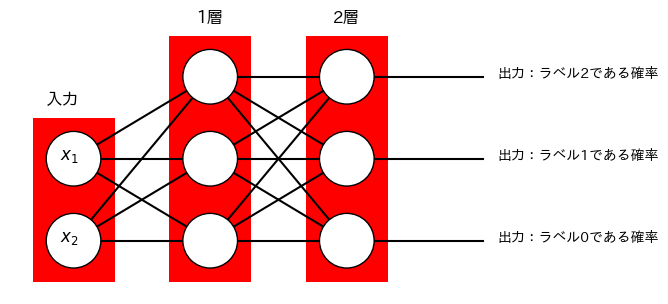

In [5]:
ax = plt.axes()
ax.axis("off")
h = 3
w = 5
n_node = [2, 3, 3]
nodes = []
for l in range(len(n_node)):
    n = n_node[l]
    ax.add_patch(patches.Rectangle(xy=(w*l-1.5, -1.5), width=3, height=h*n_node[l], fc='r', zorder=0))
    if l > 0:
        ax.text(w*l-0.5, h*(n_node[l]-1)+2, '{}層'.format(l), fontsize=12)
    for i in range(n_node[l]):
        ax.add_patch(patches.Circle(xy=(w*l, h*i), radius=1, fc='w', ec='k', zorder=2))
        if l < len(n_node) - 1:
            for j in range(n_node[l+1]):
                ax.plot([w*l, w*(l+1)], [h*i, h*j], c='k', zorder=1)
ax.text(-0.5, h, r"$x_1$", fontsize=12)
ax.text(-0.5, 0, r"$x_2$", fontsize=12)
ax.text(-1, 5, '入力', fontsize=12)
for i in range(n_node[-1]):
    ax.plot([w*(len(n_node)-1), w*len(n_node)], [h*i,h*i], c='k', zorder=1)
    ax.text(w*len(n_node)+0.5, h*i, '出力：ラベル{}である確率'.format(i), zorder=1)
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

最後の層からの出力は3次元のベクトル$(p_0, p_1, p_2)$となりますが、
**$p_i$は入力したデータのラベルが$i$である確率**をニューラルネットが予測した値となります。

このようにニューラルネットの出力が3次元なので、
ラベル（教師信号）も3次元である必要があり、
ラベルをワンホット符号で表現するのです。

ニューラルネットの出力からラベルを予測する時は、
確率$p_i$を最大にする$i$を選べばよいことになります。

上図のニューラルネットをKerasでプログラミングします。

```python
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()
%time history = model.fit(train, label, epochs=200, verbose=0)
```

プログラムを解説しましょう。
「演習・Kerasによるプログラミング入門（1）（2）」も参考にして下さい。

1. まず、初期化されたモデルを生成します。
```python
model = Sequential()
```
1. 「入力層」をモデルに追加します。
```python
model.add(Input(shape=(2,)))
```
1. 「全結合層」をモデルに追加します。
各層は3個のノードから構成されるものとし、
活性化関数（activation）はReLU関数とします。
ReLU関数を使うことで学習が高速になります。
```python
model.add(Dense(3, activation='relu'))
```
1. 3次元の出力を生成する「全結合層」をモデルに追加します。
出力が各ラベルの確率となるように
活性化関数（activation）はソフトマックス関数を選びます。
```python
model.add(Dense(3, activation='softmax'))
```
> ソフトマックス関数は次の式で定義されます。
>
> $$
\mathrm{softmax}(x_1, \dots, x_n) =
\left(\frac{e^{x_1}}{e^{x_1} + \dots + e^{x_n}}, \dots,
\frac{e^{x_n}}{e^{x_n} + \dots + e^{x_n}}
\right)
$$
>
> 全ての項は正で、その総和は1となるので、
各項は確率、ベクトルは確率分布を表現しているとみなすことができるのです。
>
> 実は、ソフトマックス関数という命名は正確とはいえません。
> 正しいソフトマックス関数は次の式で与えられます。
>
> $$
f(x_1, \dots, x_n; \gamma) = e^{\gamma x_1} + \dots + e^{\gamma x_n}
$$
>
> この関数がソフトマックス関数と呼ばれる理由は、次の式が成り立つことによります。
>
> $$
\max\{x_1, \dots x_n\} = \lim_{\gamma\to\infty}
\frac 1\gamma \log f(x_1, \dots, x_n; \gamma)
$$
> （ハード）マックス関数$\max(x_1, \dots, x_n)$は微分可能な関数ではありません。
>
> ソフトマックス関数という名前は、**マックス関数の近似として使える微分可能な関数**という意味を持ちます。
>
> 一方、$\{x_1, \dots, x_n\}$で最大の値をとる項の個数を$m$とする時、
>次の式が成り立ちます。
>
> \begin{align}
&
\lim_{\gamma\to\infty}
\frac{e^{\gamma x_i}}{e^{\gamma x_1} + \dots + e^{\gamma x_n}}
\\&\qquad
= \begin{cases}
\frac 1m & \text{$x_i = \max\{x_1, \dots, x_n\}$の時}\\
0 & \text{$x_i < \max\{x_1, \dots, x_n\}$の時}
\end{cases}
\end{align}
>
> つまり、ここで「ソフトマックス関数」と呼ぶ関数は、
本来は「ソフトアルグマックス（soft argmax）関数」と呼ぶべきです。
>
> $\mathrm{argmax}\{x_1, \dots, x_n\}$は最大値を示す項の添え字の集合を表します。
>
> $$
i \in \mathrm{argmax}\{x_1, \dots, x_n\} \Leftrightarrow
x_i = \max\{x_1, \dots, x_n\}
$$

1. 最適パラメータの最適化アルゴリズムにはADAMを使います。
```python
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
```
1. ニューラルネットを「コンパイル」します。
損失関数には平均二乗誤差（**mean squared error**）を使います。
```python
model.compile(loss='mean_squared_error', optimizer=optimizer)
```
1. 「コンパイル」したニューラルネットの構成を表示して、
想定通りであるか確認しましょう。
```python
model.summary()
```
1. 先に生成した訓練データを使ってモデルの学習を行います。
```python
history = model.fit(train, label, epochs=1000, verbose=0)
```

```python
%time history = model.fit(train, label, epochs=1000, verbose=0)
```
で学習時間（fit関数の実\行時間）を計測し、実行結果と共に表示します。
- CPU timesはCPUを使用した時間です。
- Wall timeは経過時間です。
- Wall time < CPU time となった時は、計算機が並列計算処理を実行したことを示します。

In [6]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()
%time history = model.fit(train, label, epochs=200, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
CPU times: user 6.19 s, sys: 281 ms, total: 6.47 s
Wall time: 5.83 s


### モデルの評価
得られたモデルの性能を評価してみましょう。

- 100個のテストデータをランダムに生成します。
```python
test = np.random.rand(100,2)
```
- テストデータに正解ラベルを計算し、配列に記録します。
```python
test_label = [0 if (x-0.3)**2 + (y-0.3)**2 < 0.09 else
          1 if x>0.5 and x<0.95 and y>0.6 and y<0.95 else 2 for x, y in test]
```
accuracy_score関数を使って正解率を計算します。

1. `model.predict(test)`で100個のテストデータに対する予測を行います。
1. `for p in model.predict(test)`で、
テストデータに対するニューラルネットの予測を順に1個ずつ取り出して、
`p`という名前で参照します。
`p`は3個の要素をもつ配列$(p_0, p_1, p_2)$になり、
$p_i$は「テストデータのラベルが$i$である確率」を表します。
1. 予測が`p`であるデータに対する予測ラベルは、
最も確率の高いラベル、即ち、
$\mathrm{argmax}\{p_0, p_1, p_2\}$と与えられますので、
`np.argmax(p)`で計算します。
1. 従って、予測の正解率は以下の式で計算されます。

```python
accuracy_score([np.argmax(p) for p in model.predict(test)], test_label)
```

次のプログラムを実行しましょう。
```python
test = np.random.rand(100,2)
test_label = [0 if (x-0.3)**2 + (y-0.3)**2 < 0.09 else
          1 if x>0.5 and x<0.95 and y>0.6 and y<0.95 else 2 for x, y in test]
print('テストデータに対する正解率')
print(accuracy_score([np.argmax(p) for p in model.predict(test)], test_label))
label_serial = [np.argmax(p) for p in label]
print('訓練データに対する正解率')
print(accuracy_score([np.argmax(p) for p in model.predict(train)], label_serial))
```

In [7]:
test = np.random.rand(100,2)
test_label = [0 if (x-0.3)**2 + (y-0.3)**2 < 0.09 else
          1 if x>0.5 and x<0.95 and y>0.6 and y<0.95 else 2 for x, y in test]
print('テストデータに対する正解率')
print(accuracy_score([np.argmax(p) for p in model.predict(test)], test_label))
label_serial = [np.argmax(p) for p in label]
print('訓練データに対する正解率')
print(accuracy_score([np.argmax(p) for p in model.predict(train)], label_serial))

テストデータに対する正解率
4/4 [==============================] - 0s 7ms/step
0.53
訓練データに対する正解率
16/16 [==============================] - 0s 7ms/step
0.534


良好な結果が得られなかったのではないでしょうか？

視覚的に確認してみましょう。

次のプログラムでは、$[0, 1] \times [0, 1]$の領域中に、
$51 \times 51$個の格子点を取り、
その点に対するモデルの予測結果を図示し
- 予測ラベルが$0$の点を薄い赤でプロット
- 予測ラベルが$1$の点を薄い緑でプロット
- 予測ラベルが$2$の点を薄い青でプロット
```python
X, Y = np.meshgrid(np.linspace(0,1,51), np.linspace(0,1,51))
test = np.array(list(zip(X.reshape(-1,), Y.reshape(-1,))))
test_label = [0 if 2*x - y < 0 else 1 if 2*x + y < 2 else 2 for x, y in test]
prediction = model.predict(test)
pred_label = [np.argmax(p) for p in prediction]
toPlotTest = [[], [], []]
for i in range(len(test)):
    toPlotTest[pred_label[i]].append(test[i])
print(len(toPlotTest[0]), len(toPlotTest[1]), len(toPlotTest[2]))
plt.figure(figsize=(5,5))
toPlotTest = [np.array(toPlotTest[i]) for i in range(3)]
for i in range(3):
    if len(toPlotTest[i]) > 0:
        plt.scatter(toPlotTest[i][:, 0], toPlotTest[i][:, 1], c=color[i], alpha=0.2)
    plt.scatter(toPlot[i][:, 0], toPlot[i][:, 1], c=color[i])
plt.grid()
plt.show()
print('正解率 = ', accuracy_score(pred_label, test_label))
```

82/82 [==============================] - 1s 5ms/step
0 0 2601


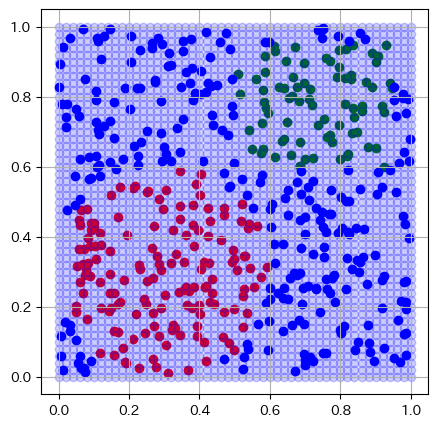

正解率 =  0.25990003844675125


In [8]:
X, Y = np.meshgrid(np.linspace(0,1,51), np.linspace(0,1,51))
test = np.array(list(zip(X.reshape(-1,), Y.reshape(-1,))))
test_label = [0 if 2*x - y < 0 else 1 if 2*x + y < 2 else 2 for x, y in test]
prediction = model.predict(test)
pred_label = [np.argmax(p) for p in prediction]
toPlotTest = [[], [], []]
for i in range(len(test)):
  toPlotTest[pred_label[i]].append(test[i])
print(len(toPlotTest[0]), len(toPlotTest[1]), len(toPlotTest[2]))
plt.figure(figsize=(5,5))
toPlotTest = [np.array(toPlotTest[i]) for i in range(3)]
for i in range(3):
  if len(toPlotTest[i]) > 0:
      plt.scatter(toPlotTest[i][:, 0], toPlotTest[i][:, 1], c=color[i], alpha=0.2)
  plt.scatter(toPlot[i][:, 0], toPlot[i][:, 1], c=color[i])
plt.grid()
plt.show()
print('正解率 = ', accuracy_score(pred_label, test_label))

モデルの分類性能をどのように評価しますか？

### 演習
現在のモデルの性能は満足できるものではない。
ニューラルネットの構造（層の階数・ノードの個数）やハイパーパラメータを変更して、
以下の2つの要件を満足するようにモデルの性能を改善せよ。
- 格子点に対する予測の正解率を0.95以上で可能な限り1に近くする
- 学習にかかるtotal CPU timeを可能な限り短くする